# Stock Market Time-Series Analysis and Forecasting in Python
------
### Introduction to the Stock Market
The New York Stock Exchange (NYSE), the American stock exchange, 
sanctions the buying and trading of shares for publicly 
registered companies. The public stock exchange allows businesses to
raise financial capital by selling shares of ownership. The value of a share to 
investors is measured by a stock price. There are many variables and uncertainties which
can influence a stock's price away from market equilibrium. Overly optimistic or pessimistic 
conditions can drive stock value excessively high or low. The erratic nature of 
stock behavior creates a market risk. Investors look for stocks with 
value expected to rise while avoiding stocks with value expected to decrease.
Knowledge of stock price movement is essential for minimizing market risk.    

### Objective
The goal of this project is to explore the process of knowledge discovery from
financial data (financial KDD) for several stocks in the technology sector (listed in table). 
The information (historical stock quotes) will be retrieved live from the Yahoo! Finance web service. 
The Collected information is then formatted as a financial time series. 
This mathematical model is ideal for finding statistical descriptions and data visualizations of 
asset evaluation over time. 

| Technology Stock | Ticker |
|---------------|--------------|
| Adv Micro Devices | (**AMD**) | 
| Cisco Systems Inc | (**CSCO**) | 
| Intel Corp | (**INTC**) | 
| Micron Technology | (**MU**) | 
| Nvidia Corp | (**NVDA**) |
| Oracle Corp | (**ORCL**) | 
| Qualcomm Inc | (**QCOM**) | 

The process of knowledge discovery from the financial data will be split into two parts:
   
**Part 1**: For the first part, interesting knowledge will be discovered using statistical methods. These will describe 
the collection, analysis, interpretation, and presentation of the data. A *statistical model* is established
mathematical functions describing the behavior of objects in terms of random variables and their associated
probability distributions. This Project is based on the previously mentioned statistical model 
known as a time series. A central idea of the project will be understanding a financial time series using 
*statistical descriptions*. These will be used to identify the properties of the series and find 
data values which are noise or outliers. This will merge with the last concept of Part 1, *relevance analysis*, 
which is the first step in the data mining functionality: Classification and Regression for Predictive Analysis. 
This is described as attempting to identify attributes which are more relevant to the predictive process. 

**Part 2**: The second part of the knowledge discovery from data (KDD) process is based on 
the *predictive analysis* concepts of the data mining functionality: Classification and Regression for 
Predictive Analysis. The predictive process is a type of *Supervised Learning* because the extracted 
dataset will serve as "supervision" for the learning process. Attributes from the preprocessed 
data in Part 1 will make up the training set for the Classification learning phase. A classifier will 
be constructed to predict a financial attribute.    

### Outline



## (Part 1) Time Series Analysis
---------------
### Description
------
##### Definition:

The **Time Series** on a variable/attribute *a* is indicated as *a<sub>t</sub>*, with the subscript t 
representing time. The first and last observations available on attribute *a* are at t = 1, and t = T.


The set of times t = {1, 2,.. ,T} is referred to as the *observation period*.
<pre>    
    Observations are typically measured in equally spaced intervals (frequency), (i.e minute, hour, 
    day, etc... for finance). 
</pre>

Essentially, a time series contains quantitative observations on one or more assessable characteristics of
an entity, taken at multiple points in time. 

For financial data, because the mean level cannot be regarded as a constant, the series is said to be *nonstationary*
    
### Analysis:

time series analysis applies different statistical methods to explore and model the internal 
structures of the time series data. 

Several interesting internal structures are:  trend, seasonality, stationarity, autocorrelation, etc..

The internal structures require special formulation and techniques for their analysis 

##### Frequency

Financial data is a fixed frequency time series, meaning the 
data points occur at regular intervals. This project will focus on financial time series with a daily 
frequency. Higher frequencies in financial time series is referred to as "high frequency" or "tick-by-tick" data.


### Time Series Package Imports


In [9]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Time stamps
import datetime as datetime

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


### Getting Stock Price Quotes
-----
The *historical stock quote* is made up of tuples with 6 associated class labels.
Therefore, a tuple is represented as a 6-dimensional attribute vector (High, Low, Open, Close, Volume, Adj Close).

Attribute Information:

*   High: The highest share price for Date
*   Low: The lowest share price for Date
*   Open: The opening share price on Date
*   Close: The closing share price on Date
*   Volume: The number of shares traded on Date
*   Adj Close: The closing price adjusted for stock splits and dividends

The pandas_datareader.Data module returns a *Panel* object. This can be represented as a
3-Dimensional matrix. The first dimension are the date-time indexes, 
the second dimension is made up of the six attributes Yahoo! Finance returns, 
the third dimension are the ticker identifiers. 


In [27]:
#  Stock tickers to retrieve historical index data
ticker_index_data = ['AMD', 'CSCO', 'INTC', 'MU', 'NVDA', 'ORCL', 'QCOM']

#  Assign a database with historical stock quotes from Yahoo! Finance to each ticker
for ticker in ticker_index_data:
    globals()[ticker] = data.get_data_yahoo(ticker, '2017-10-10', '2019-04-10')
                                                    #  Changed start to 1.5 years

Use the pandas DataFrame **.tail()** method to show the most recent five rows of AMD stock 
quotes

In [26]:
#  Five most recent rows of DataFrame
AMD.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-05,29.690001,28.799999,29.639999,28.980000,65662700,28.980000
2019-04-08,28.950001,28.180000,28.690001,28.530001,58002500,28.530001
2019-04-09,28.379999,27.190001,28.240000,27.240000,75539800,27.240000
2019-04-10,28.120001,27.320000,27.459999,27.830000,64368100,27.830000
2019-04-11,28.049999,27.459999,27.809999,27.790001,44801200,27.790001


#### Group Technology Stock Price Quotes 
Use the pandas Series concat() method to concatenate pandas objects.   


In [30]:
tech_stocks = pd.concat([AMD, CSCO, INTC, MU, NVDA, ORCL, QCOM], axis=1, keys=ticker_index_data)
#  The "axis" param of 1 represents concatenating along the column axis. 
#  The "keys" param is a hierarchical index for each technology stock ticker. 


Use the pandas DataFrame **.head()** method to display the first 5 rows of group stock quotes

In [32]:
#  First five rows of DataFrame
tech_stocks.head()


AMD                                                CSCO  \
             High    Low   Open  Close    Volume Adj Close       High   
Date                                                                    
2017-10-10  13.79  13.44  13.72  13.70  43304000     13.70  33.910000   
2017-10-11  13.96  13.61  13.62  13.88  38746600     13.88  33.630001   
2017-10-12  14.37  13.81  13.85  14.20  69874100     14.20  33.459999   
2017-10-13  14.41  14.12  14.32  14.22  37515800     14.22  33.570000   
2017-10-16  14.35  14.12  14.25  14.26  34136800     14.26  33.639999   

                                             ...       ORCL             \
                  Low       Open      Close  ...       Open      Close   
Date                                         ...                         
2017-10-10  33.470001  33.880001  33.549999  ...  48.160000  48.209999   
2017-10-11  33.250000  33.380001  33.590000  ...  48.160000  48.279999   
2017-10-12  33.169998  33.259998  33.259998  ...  48.270000  48.230000   
2017-10-13  33.320000  33.400002  33.470001  ...  48.369999  48.610001   
2017-10-16  33.470001  33.599998  33.540001  ...  48.610001  48.860001   

                                        QCOM                                   \
                Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2017-10-10  15630500.0  47.049263  53.900002  52.900002  52.950001  53.869999   
2017-10-11  12588300.0  47.117577  54.380001  53.660000  53.790001  54.119999   
2017-10-12  11715600.0  47.068783  54.180000  52.959999  53.880001  53.000000   
2017-10-13  10142300.0  47.439636  53.380001  52.740002  53.380001  52.820000   
2017-10-16   9378100.0  47.683620  53.000000  52.310001  52.980000  52.380001   

                                  
               Volume  Adj Close  
Date                              
2017-10-10  8761700.0  50.250084  
2017-10-11  9427300.0  50.483288  
2017-10-12  7062300.0  49.438553  
2017-10-13  7005600.0  49.270645  
2017-10-16  5930900.0  48.860210  

[5 rows x 42 columns]

### Exploring the Data
-----

##### Data Structure
The Pandas DataFrame **.shape** attribute displays the database's dimensionality

In [34]:
AMD.shape


(378, 6)

The Pandas DataFrame **.dtypes** attribute returns a series with the data type of
each column


In [33]:
AMD.dtypes


High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

##### Descriptive Statistics
The pandas Series' **.describe()** method generates descriptive statistics summarizing the central measures
(min, mean, max), dispersion (std), and shape of distribution.
 
The mean, std, min, max, and percentiles for each attribute in the AMD stock quote. 

In [7]:
AMD.describe()


,High,Low,Open,Close,Volume,Adj Close
count,378.000000,378.000000,378.000000,378.000000,3.780000e+02,378.000000
mean,17.925212,17.053095,17.494392,17.497381,7.927800e+07,17.497381
std,6.445175,6.008648,6.237150,6.233647,4.433242e+07,6.233647
min,9.770000,9.040000,9.080000,9.530000,1.103580e+07,9.530000
25%,12.042500,11.562500,11.730000,11.812500,4.679845e+07,11.812500
50%,16.850000,16.150000,16.510000,16.535000,6.578995e+07,16.535000
75%,22.387500,21.122499,21.807500,22.062500,9.965758e+07,22.062500
max,34.139999,32.189999,33.180000,32.720001,3.250584e+08,32.720001


##### Visualising Historical Closing Quotes of Financial Data

Matplotlib displays a historical view of the shares closing price ('Adj Closing' preferred to 'Closing')

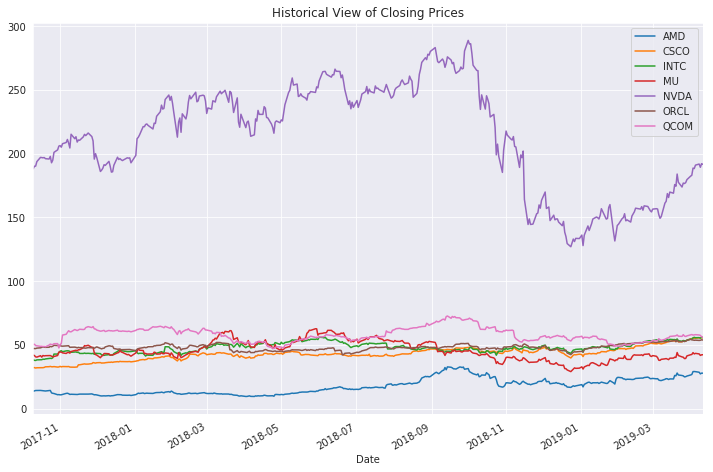

In [35]:
#  Add each stock's historical closing price time series to plot
AMD['Adj Close'].plot(legend=True, label='AMD', title='Historical View of Closing Prices', figsize=(12, 8))
CSCO['Adj Close'].plot(legend=True, label='CSCO')
INTC['Adj Close'].plot(legend=True, label='INTC')
MU['Adj Close'].plot(legend=True, label='MU')
NVDA['Adj Close'].plot(legend=True, label='NVDA')
ORCL['Adj Close'].plot(legend=True, label='ORCL')
QCOM['Adj Close'].plot(legend=True, label='QCOM')
